In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
%cd '/content/drive/MyDrive/HUST GIFTED CLASS K66/IPSAL LAB/Computer vision/Slides/Tuan7_8/assignment/tuto/'

/content/drive/MyDrive/HUST GIFTED CLASS K66/IPSAL LAB/Computer vision/Slides/Tuan7_8/assignment/tuto


In [8]:
import os
curent = os.getcwd()
print(curent)

/content/drive/MyDrive/HUST GIFTED CLASS K66/IPSAL LAB/Computer vision/Slides/Tuan7_8/assignment/tuto


In [5]:
import numpy as np
# from scipy import signal
import matplotlib.pyplot as plt

import cv2
from PIL import Image
import torch
import torchvision
import torchvision.transforms as T
import torchvision.transforms.functional as TF

In [6]:
def normalize_0_255(img):
    min_val = np.min(img)
    max_val = np.max(img)
    new_img = (img - min_val)/(max_val - min_val) # 0 - 1
    new_img *= 255
    return new_img

In [7]:
def normalize_0_1(img):
    min_val = np.min(img)
    max_val = np.max(img)
    new_img = (img - min_val)/(max_val - min_val)
    return new_img

# Read image

Text(0.5, 1.0, 'Ảnh grayscale')

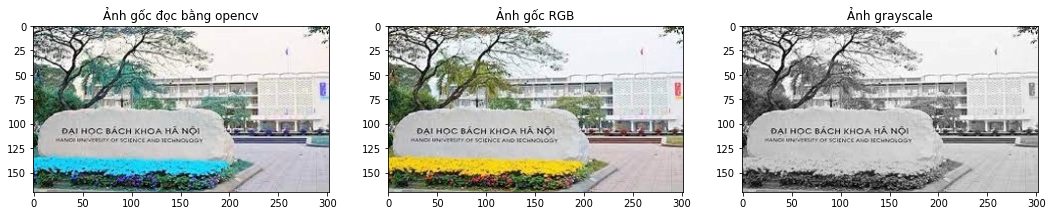

In [9]:
import cv2
from PIL import Image
img = cv2.imread(curent + '/images/HUST.jpg')

img1 = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# closing all open windows
# cv2.destroyAllWindows()
plt.figure(figsize = (18, 8))
plt.subplot(131)
plt.imshow(img)
plt.title('Ảnh gốc đọc bằng opencv')
plt.subplot(132)
plt.imshow(img1)
plt.title('Ảnh gốc RGB')
plt.subplot(133)
plt.imshow(img_gray,cmap='gray')
# plt.imshow(img_gray)
plt.title('Ảnh grayscale')
# plt.xticks([]), plt.yticks([])
# Lưu ý ảnh đọc từ openCv default là BGR, nên cần lệnh cvtColor để đổi sang RGB


Đọc ảnh cần detect biên

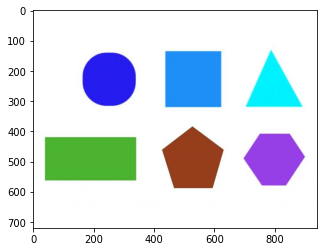

In [10]:
import cv2
from PIL import Image
img = cv2.imread(curent + '/images/geometry.jpg')
plt.figure(3)
plt.clf()
plt.imshow(img)

(720, 940, 3)


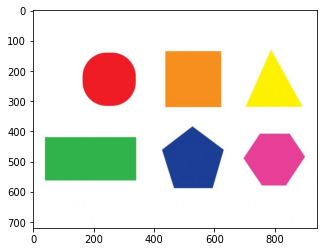

In [11]:
img1 = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

print(img1.shape)
plt.figure(4)
plt.clf()
plt.imshow(img1)

In [12]:
# image_PIL = Image.open('../images/cameraman.png')

## Cach 1: dung cv2.Canny

In [14]:
min_val = img1.min()
max_val = img1.max()
print(min_val, max_val)
edges = cv2.Canny(img1, 100, 200)

0 255


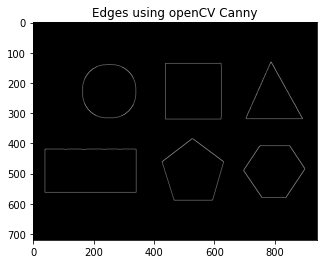

In [16]:
plt.figure(5)
plt.clf()
plt.imshow(edges, cmap = 'gray')
plt.title('Edges using openCV Canny');

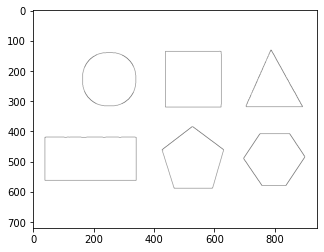

In [18]:
plt.imshow(1- normalize_0_1(edges), cmap = 'gray')

(([], <a list of 0 Text major ticklabel objects>),
 ([], <a list of 0 Text major ticklabel objects>))

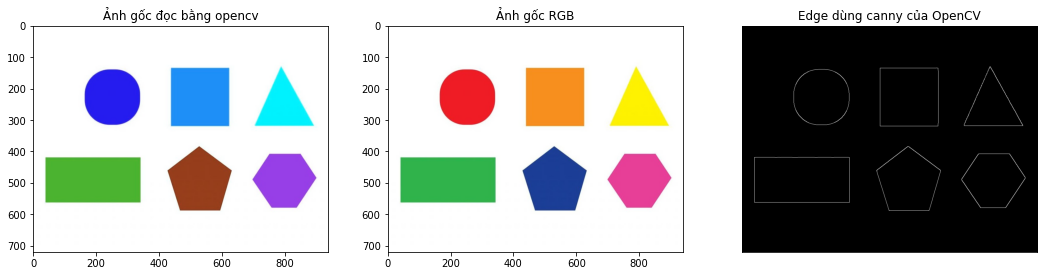

In [20]:
# closing all open windows
cv2.destroyAllWindows()
plt.figure(figsize=(18,8))
plt.subplot(131)
plt.imshow(img)
plt.title('Ảnh gốc đọc bằng opencv')
plt.subplot(132)
plt.imshow(img1)
plt.title('Ảnh gốc RGB')
plt.subplot(133)
# plt.imshow(edges,cmap='gray')
plt.imshow(edges, cmap = 'gray')
plt.title('Edge dùng canny của OpenCV')
plt.xticks([]), plt.yticks([])
# Lưu ý ảnh đọc từ openCv default là BGR, nên cần lệnh cvtColor để đổi sang RGB


Test with grayscale

(256, 256, 3) (256, 256) (256, 256)


Text(0.5, 1.0, '1-Edge dùng canny của OpenCV')

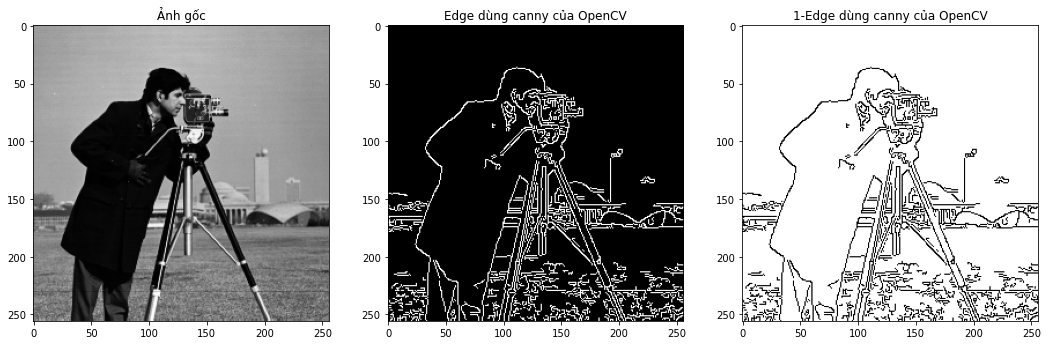

In [21]:
import cv2
from PIL import Image
img = cv2.imread(curent + '/images/cameraman.png')

img_cvt = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(img_cvt, 100, 200)
print(img.shape,img_cvt.shape,edges.shape)

plt.figure(figsize=(18,8))
plt.subplot(131)
plt.imshow(img_cvt,cmap='gray')
plt.title('Ảnh gốc')
plt.subplot(132)
plt.imshow(edges,cmap='gray')
plt.title('Edge dùng canny của OpenCV')
plt.subplot(133)
# plt.imshow(edges,cmap='gray')
plt.imshow(255-edges,cmap='gray')
plt.title('1-Edge dùng canny của OpenCV')

# Cach 2: Chi dung cv2 truc tiep cho cac leh thuc hien smoothing va gradient

In [23]:
import cv2
from PIL import Image
img = cv2.imread((curent + "/images/geometry.jpg"))
img_color= cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_gray= cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
print(img.shape,img1.shape,edges.shape)

(720, 940, 3) (720, 940, 3) (256, 256)


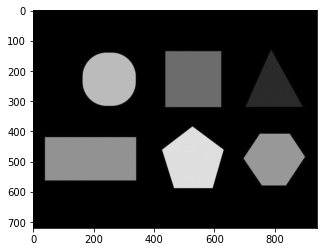

In [25]:
plt.imshow(255 - normalize_0_255(img_gray), cmap = 'gray')

Doc anh de bat dau thuat toan edge detection tung buoc

(720, 940)


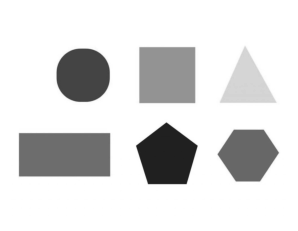

In [26]:
I_input = img_gray
print(I_input.shape)
plt.imshow(I_input, cmap = 'gray')
plt.axis('off');

## Canny edge detector

1. It is a multi-stage algorithm and we will go through each stages.
2. Noise Reduction
Since edge detection is susceptible to noise in the image, first step is to remove the noise in the image with 5x5 Gaussian filter. We have already seen this in previous chapters

In [27]:
#2. Noise Reduction
smooth_img = cv2.GaussianBlur(I_input, ksize = (3,3), sigmaX=1, sigmaY=1)

(720, 940)


(([], <a list of 0 Text major ticklabel objects>),
 ([], <a list of 0 Text major ticklabel objects>))

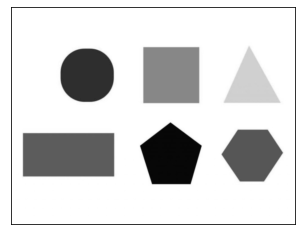

In [28]:
print(smooth_img.shape)
plt.figure(5)
plt.clf()
plt.imshow(smooth_img,cmap='gray')  
plt.xticks([]), plt.yticks([])

Khi tính toán, giá trị hướng gradient sẽ nằm trong đoạn [-180, 180] độ, ta không giữ nguyên các góc này mà gom các giá trị này về 4 hướng: hướng ngang (0 độ), hướng chéo bên phải (45 độ), hướng dọc (90 độ) và hướng chéo trái (135 độ).

In [44]:
#3. Finding Intensity Gradient of the Image
sobel_size = 3
Gx = cv2.Sobel(smooth_img, cv2.CV_64F, 1, 0, ksize = sobel_size)
Gy = cv2.Sobel(smooth_img, cv2.CV_64F, 0, 1, ksize = sobel_size)
is_L2_gradient = True
if is_L2_gradient:
    img_gradient = np.sqrt(Gx**2+Gy**2)
else:
    img_gradient = np.abs(Gx) + np.abs(Gy)

angle = np.arctan2(Gy, Gx) * 180/np.pi

# round angle to 4 directions
angle = np.abs(angle)
angle[angle <= 22.5] = 0
angle[angle >= 157.5] = 0
angle[(angle > 22.5) & (angle < 67.5)] = 45
angle[(angle >= 67.5) & (angle <= 112.5)] = 90
angle[(angle > 112.5) & (angle <= 157.5)] = 135

(720, 940)


(([], <a list of 0 Text major ticklabel objects>),
 ([], <a list of 0 Text major ticklabel objects>))

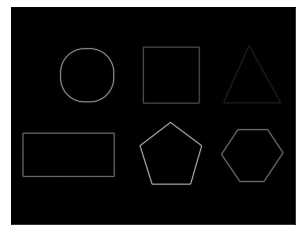

In [45]:
print(img_gradient.shape)
plt.imshow(img_gradient,cmap='gray')
plt.xticks([]), plt.yticks([])

In [46]:
print(img_gradient.min(), img_gradient.max())

0.0 580.7891183553631


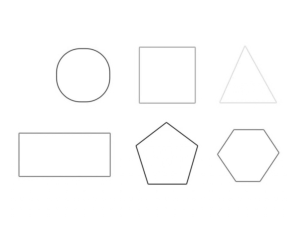

In [47]:
plt.imshow(255 - normalize_0_255(img_gradient), cmap = 'gray')
plt.axis('off');

(720, 940)


(-0.5, 939.5, 719.5, -0.5)

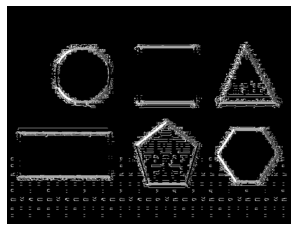

In [48]:
print(angle.shape)
plt.imshow(angle, cmap = 'gray')
plt.axis('off')

Loại bỏ các pixel ở vị trí không phải cực đại toàn cục. Ở bước này, ta dùng một filter 3x3 lần lượt chạy qua cac pixel trên ảnh gradient. Trong quá trình lọc, ta xem xét xem độ lớn gradient của pixel trung tâm có phải cực đại (lớn nhất trong cục bộ - local maximum) so với các gradient ở các pixel xung quanh. Nếu là cực đại, ta sẽ ghi nhận sẽ giữ pixel đó lại. Pixel tại đó không phải là cực đại lân cận, ta sẽ set độ lớn gradient của nó về zero. So snah pixel trung tâm với 2 pixel lân cận theo hướng gradient. Ví dụ: nếu hướng gradient là 0 độ, ta sẽ so sánh pixel trung tâm với pixel liền trái và liền phải nó. Trường hợp khác gradient là 45 độ, ta sẽ so sánh với 2 pixel hàng xóm là góc trên bên phải và góc dưới của pixel trung tâm. Tương tụ cho 2 trường hợp hướng gradient còn lại.

In [49]:
#4. Non-maximum suppression
edge_gradient = img_gradient
keep_mask = np.zeros(smooth_img.shape, np.uint8)
for y in range(1, edge_gradient.shape[0]-1):
    for x in range(1, edge_gradient.shape[1]-1):
        area_grad_intensity = edge_gradient[y-1:y+2, x-1:x+2] # 3x3 area
        area_angle = angle[y-1:y+2, x-1:x+2] # 3x3 area
        current_angle = area_angle[1,1]
        current_grad_intensity = area_grad_intensity[1,1]
        if current_angle == 0:
            if current_grad_intensity>max(area_grad_intensity[1,0], area_grad_intensity[1,2]):
                keep_mask[y,x] = 255
            else:
                edge_gradient[y, x] = 0
        elif current_angle== 45:
            if current_grad_intensity> max(area_grad_intensity[2,0], area_grad_intensity[0,2]):
                keep_mask[y,x] = 255
            else:
                edge_gradient[y,x] = 0
        elif current_angle == 90:
            if current_grad_intensity> max(area_grad_intensity[0,1], area_grad_intensity[2,1]):
                keep_mask[y,x] = 255
            else:
                edge_gradient[y,x] = 0
        elif current_angle == 135:
            if current_grad_intensity> max(area_grad_intensity[0,0], area_grad_intensity[2,2]):
                keep_mask[y,x] = 255
            else:
                edge_gradient[y,x] = 0    

(720, 940)


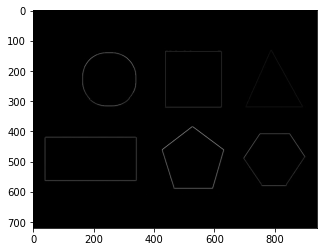

In [50]:
print(edge_gradient.shape)
plt.imshow(edge_gradient, cmap = 'gray')

Lọc ngưỡng: ta sẽ xét các pixel dương trên mặt nạ nhị phân kết quả của bước trước. Nếu giá trị gradient vượt ngưỡng max_val thì pixel đó chắc chắn là cạnh. Các pixel có độ lớn gradient nhỏ hơn ngưỡng min_val sẽ bị loại bỏ. Còn các pixel nằm trong khoảng 2 ngưỡng trên sẽ được xem xét rằng nó có nằm liền kề với những pixel đưuọc cho là 'chắc chắn là cạnh' hay không. Nếu liền kề thì ta giữ, còn không liền kề thì bất cứ pixel cạnh nào thì ta loại. Sau bước này ta có thể áp dụng thêm các bước hậu xử lí loại bỏ nhiễu (tức những pixel cạnh rời rạc hay cạnh ngắn) nếu muốn. Ảnh minh họa về ngưỡng lọc:

Tùy trường hợp cân nhắc dùng 5 hya không

0.0 580.7891183553631


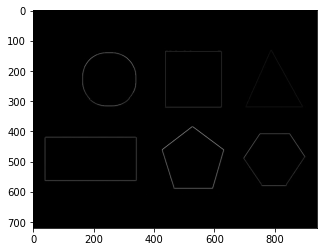

In [51]:
print(edge_gradient.min(), edge_gradient.max())
plt.imshow(edge_gradient, cmap = 'gray')

In [52]:
edge_gradient_scale = normalize_0_255(edge_gradient)
print(edge_gradient_scale.min(), edge_gradient_scale.max())

0.0 255.0


In [53]:
canny_mask = np.zeros(smooth_img.shape, np.uint8)
im_val = 100
canny_mask[(keep_mask>0) & (edge_gradient_scale>min_val)] = 255

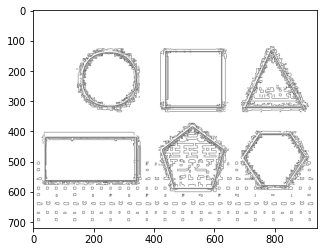

In [54]:
plt.imshow(255 - normalize_0_255(canny_mask), cmap = 'gray')

Text(0.5, 1.0, 'canny edge (step 5)')

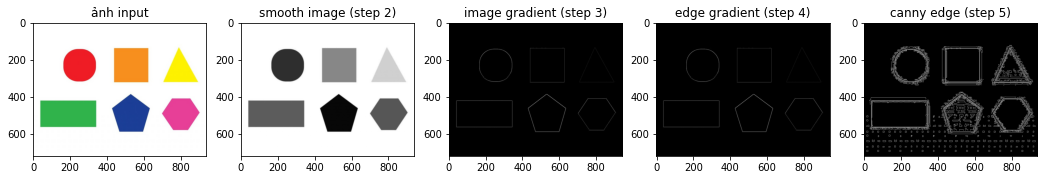

In [55]:

# print(canny_mask.shape)
plt.figure(figsize=(18,8))
plt.subplot(151)
plt.imshow(img_color)
# plt.imshow(img1,cmap='gray')
plt.title('ảnh input')
plt.subplot(152)
plt.imshow(smooth_img,cmap='gray')
plt.title('smooth image (step 2)')
plt.subplot(153)
plt.imshow(img_gradient,cmap='gray')
plt.title('image gradient (step 3)')

plt.subplot(154)
plt.imshow(edge_gradient_scale,cmap='gray')
plt.title('edge gradient (step 4)')
plt.subplot(155)
plt.imshow(canny_mask,cmap='gray')
plt.title('canny edge (step 5)')
